In [88]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [89]:
#lire
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_u6lujuX_CVtuZ9i.csv')

In [60]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [61]:
pd.set_option('display.max_rows',10)


In [ ]:
#les valeurs manquantes
df.info()
df

In [ ]:
df.describe(include=['O'])

In [ ]:
df.isnull().sum().sort_values(ascending=True)

In [90]:
#renseigner les valeurs
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
      num_data.append(df.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [91]:
#pour les vzriables categoriques on va renplacer les valeurs manquantes pare les valeurs repetitives
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()


False

In [ ]:
#pour les vzriables categoriques on va renplacer les valeurs manquantes pare les valeurs repetitives
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()


In [ ]:
target_value = {'N': 0,'Y': 1}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target = target.map(target_value)
target

In [66]:
#Supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [67]:
#concatener cat_data et spécifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
y = target
target.value_counts()
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,5849.0,0.0,128.0,360.0,1.0
1,Male,Yes,1,Graduate,No,Rural,4583.0,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,3000.0,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,2583.0,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,No,Urban,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,2900.0,0.0,71.0,360.0,1.0
610,Male,Yes,3+,Graduate,No,Rural,4106.0,0.0,40.0,180.0,1.0
611,Male,Yes,1,Graduate,No,Urban,8072.0,240.0,253.0,360.0,1.0
612,Male,Yes,2,Graduate,No,Urban,7583.0,0.0,187.0,360.0,1.0


In [68]:
#bases de données utilisées pour l'analyses opératoitrs 
df=pd.concat([cat_data,num_data,target],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,Urban,5849.0,0.0,128.0,360.0,1.0,1
1,Male,Yes,1,Graduate,No,Rural,4583.0,1508.0,128.0,360.0,1.0,0
2,Male,Yes,0,Graduate,Yes,Urban,3000.0,0.0,66.0,360.0,1.0,1
3,Male,Yes,0,Not Graduate,No,Urban,2583.0,2358.0,120.0,360.0,1.0,1
4,Male,No,0,Graduate,No,Urban,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,2900.0,0.0,71.0,360.0,1.0,1
610,Male,Yes,3+,Graduate,No,Rural,4106.0,0.0,40.0,180.0,1.0,1
611,Male,Yes,1,Graduate,No,Urban,8072.0,240.0,253.0,360.0,1.0,1
612,Male,Yes,2,Graduate,No,Urban,7583.0,0.0,187.0,360.0,1.0,1


le pourecentage des crédits accord est: 0.3127035830618892
le pourecentage des crédits non ccord est: 0.6872964169381107
la cardinalité non accordé: 192
la cardinalité: accordé 422


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


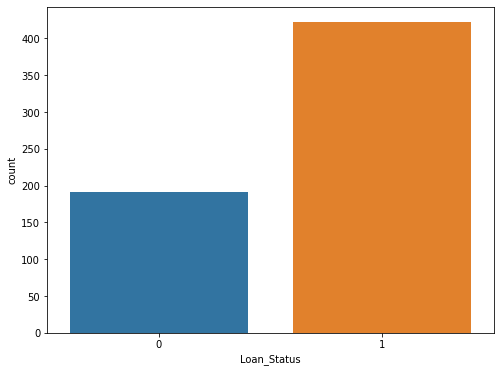

In [69]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = target.value_counts()[0]/len(target)
no = target.value_counts()[1]/len(target)
print(f'le pourecentage des crédits accord est: {yes}')
print(f'le pourecentage des crédits non ccord est: {no}')
print(f'la cardinalité non accordé: {target.value_counts()[0]}')
print(f'la cardinalité: accordé {target.value_counts()[1]}')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


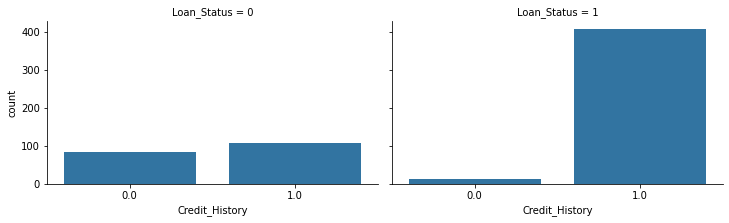

In [70]:
#la champ de gens dont la demande est non agréée 0 et  agréée 1
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


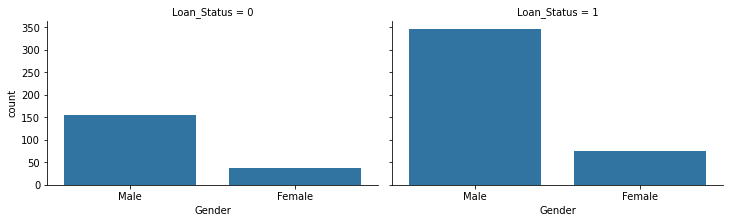

In [71]:
#sexe
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


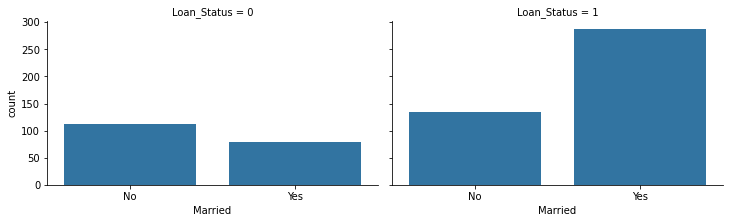

In [72]:
#Married
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


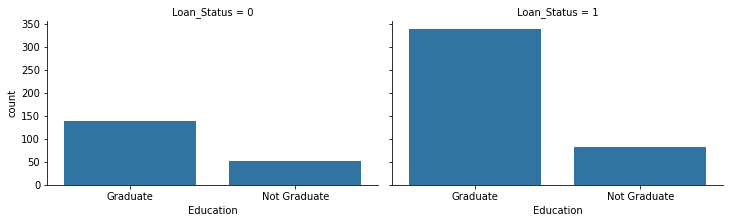

In [57]:
#Education
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

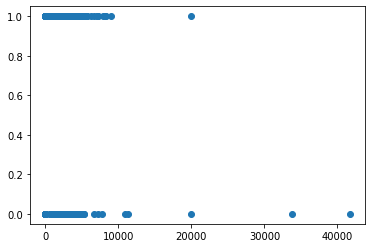

In [ ]:
#revenu du demandeur
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [ ]:
df.groupby('Loan_Status').median()

In [79]:
#diviser la base de données en une base de données test et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X,y):
  X_train, X_test = X.iloc[train],X.iloc[test]
  y_train, y_test = y.iloc[train],y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('X_train taille: ', y_train.shape)
print('X_test taille: ', y_test.shape)

X_train taille:  (491, 11)
X_test taille:  (123, 11)
X_train taille:  (491,)
X_test taille:  (123,)


In [87]:
#On va appliquer les 3 algorith => logistic regression, KNN, Decisison Tree
models = {
    'LogisticRegression': LogisticRegression(random_state=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# La fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la précision du modèle est: {acc}')

  #c'est la fonction d'application des modèles
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,': ');
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('_'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression : 


ValueError: ignored